In [1]:
import torch
import torch.nn as nn #base class for all NN modules
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Linear regression model

#parameters
weight = 0.8
bias = 0.2

#random weights
X = torch.arange(0,1, 0.04).unsqueeze(dim=1)

#model
y = (weight * X) + bias

len(X), len(y)

(25, 25)

In [3]:
# splitting data >> Recommended: scikit

train_data = int(0.8*len(X))
X_train, y_train = X[:train_data], y[:train_data]
X_test, y_test = y[train_data:], y[train_data:]

len(X_train), len(y_train), len(X_test), len(y_test)

(20, 20, 5, 5)

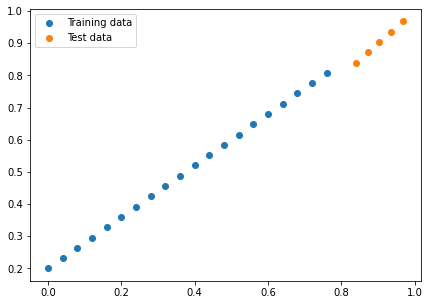

In [4]:
plt.figure(figsize=(7,5))
plt.scatter(X_train, y_train, label = 'Training data')
plt.scatter(X_test, y_test, label = 'Test data')

plt.legend()
plt.show()

In [5]:
'''nn.parameter >> it gets automatically added to the model parameters 
                   (net.parameters()) (but not the variables)
                   (learnable parameters of the network - one way)
''' 
#Model for linear regression
class LinearRegression(nn.Module):
  def __init__(self):
    super().__init__()
    #Initialize layers, parameters for our model
    self.weights = nn.Parameter(torch.randn(1,requires_grad=True))
    self.bias = nn.Parameter(torch.rand(1, requires_grad=True))

  def forward(self,x):
    return self.weights * x + self.bias
    

In [6]:
#internals
torch.manual_seed(42)

model = LinearRegression()
list(model.parameters())
model.state_dict()


OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.3904]))])

In [7]:
with torch.inference_mode():  #similar to with torch.no_grad()
  y_predictions = model(X_test)

y_predictions

tensor([[0.6733],
        [0.6840],
        [0.6948],
        [0.7056],
        [0.7164]])

In [8]:
y_test

tensor([[0.8400],
        [0.8720],
        [0.9040],
        [0.9360],
        [0.9680]])

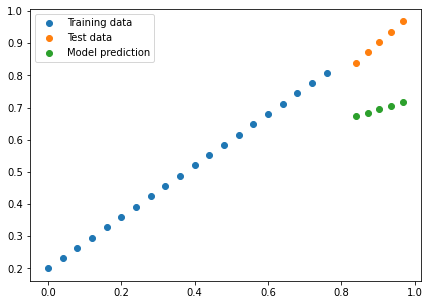

In [9]:
plt.figure(figsize=(7,5))
plt.scatter(X_train, y_train, label = 'Training data')
plt.scatter(X_test, y_test, label = 'Test data')
plt.scatter(X_test, y_predictions, label = 'Model prediction')
plt.legend()
plt.show()

In [10]:
#Loss function >> criterion or cost function
'''nn.L1loss - mean absolute error
   torch.mean((y_prdiction - y_test))
'''
loss_function = nn.L1Loss()
optimizer = torch.optim.SGD(model.parameters(),
                            lr = 0.015)


In [11]:
# loop parameters
epochs = 200

epoch_array = []
training_losses = []
test_losses = []

In [12]:
torch.manual_seed(42)
#training
for epoch in range(epochs):
  model.train() #sets the model parameter's require_grad = True
  output = model.forward(X_train)
  loss = loss_function(output, y_train) #loss_fn(input, target)
  optimizer.zero_grad() #resets the gradients for each iteration (or else it accumulates)
  loss.backward() #backpropagation
  optimizer.step()

  #testing
  model.eval()
  with torch.no_grad():
    test_output = model(X_test)
    test_loss = loss_function(test_output, y_test) #loss_function(input,target)
  if epoch % 10 == 0:
    epoch_array.append(epoch)
    training_losses.append(loss)
    test_losses.append(test_loss)
    print(f'Epoch: {epoch} >> Training loss: {loss} Test loss: {test_loss}')

Epoch: 0 >> Training loss: 0.09317435324192047 Test loss: 0.20851409435272217
Epoch: 10 >> Training loss: 0.08786191046237946 Test loss: 0.19977571070194244
Epoch: 20 >> Training loss: 0.08270189166069031 Test loss: 0.18695254623889923
Epoch: 30 >> Training loss: 0.07753230631351471 Test loss: 0.17412938177585602
Epoch: 40 >> Training loss: 0.0723542794585228 Test loss: 0.16130618751049042
Epoch: 50 >> Training loss: 0.06717626750469208 Test loss: 0.14848299324512482
Epoch: 60 >> Training loss: 0.06199824810028076 Test loss: 0.135659858584404
Epoch: 70 >> Training loss: 0.05682025104761124 Test loss: 0.12283675372600555
Epoch: 80 >> Training loss: 0.05164225026965141 Test loss: 0.1100137010216713
Epoch: 90 >> Training loss: 0.046464256942272186 Test loss: 0.09719063341617584
Epoch: 100 >> Training loss: 0.0413019023835659 Test loss: 0.08232512325048447
Epoch: 110 >> Training loss: 0.03614191710948944 Test loss: 0.06950207054615021
Epoch: 120 >> Training loss: 0.03098193369805813 Test l

In [13]:
model.state_dict()

OrderedDict([('weights', tensor([0.7912])), ('bias', tensor([0.2089]))])

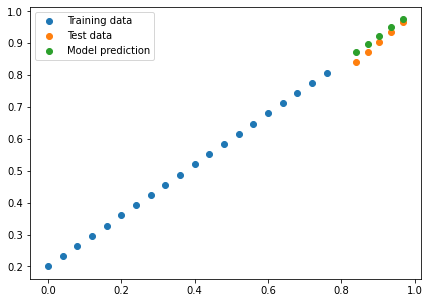

In [14]:
plt.figure(figsize=(7,5))
plt.scatter(X_train, y_train, label = 'Training data')
plt.scatter(X_test, y_test, label = 'Test data')
plt.scatter(X_test, test_output, label = 'Model prediction')
plt.legend()
plt.show()

In [15]:
training_losses = np.array(torch.tensor(training_losses).numpy())
test_losses = np.array(torch.tensor(test_losses).numpy())

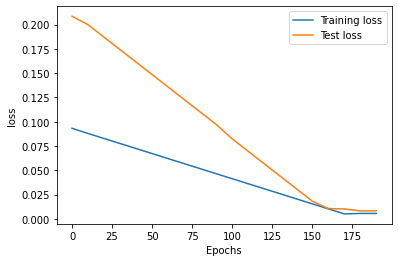

In [16]:
#Visualizing losses
plt.plot(epoch_array, training_losses, label = 'Training loss')
plt.plot(epoch_array, test_losses, label = 'Test loss')
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.legend();

In [17]:
## just as a part of coursework
## saving model 

'''
torch.save() >> saves the model in pickle format
torch.load()
torch.nn.Module.load_state_dict()
'''

from pathlib import Path

#directory
model_path = Path('models')
model_path.mkdir(parents = True, exist_ok = True)

model_name = 'LinearRegression_model.pth'
model_saved_path = model_path / model_name   # f-like object

print(f'saving model')
torch.save(obj = model.state_dict(), f = model_saved_path)

saving model


In [18]:
#loading the saved model

loaded_model = LinearRegression() #create new model instance first and then update it
loaded_model.load_state_dict(torch.load(f=model_saved_path))


<All keys matched successfully>

In [19]:
loaded_model.state_dict()

OrderedDict([('weights', tensor([0.7912])), ('bias', tensor([0.2089]))])

In [20]:
# Building a linear model 

class LinearRegressionV2(nn.Module):
  def __init__(self):
    super().__init__()
    self.linear = nn.Linear(in_features=1, out_features=1)

  def forward(self, x):
    return self.linear(x)

In [21]:
torch.manual_seed(42)
model_v2 = LinearRegressionV2()
model_v2.state_dict()

OrderedDict([('linear.weight', tensor([[0.7645]])),
             ('linear.bias', tensor([0.8300]))])

In [ ]:
# using CUDA

'''
adding device agnostic code
model.to(device) & predictions.to(device)
plotting uses numpy and it requires data on cpu >> tensor.cpu()
'''